## This notebook is to simply model the epicurve of 2019-nCov using SIR epidemic model
### Authors: Owen Xu(NZ), Yijun Wang(USA) 
#### 1. I used SIR because 2019-nCov is very likely to infect during its incubation
#### 2. We have multiple assumptions that are based on the current research results (see comments and references)
#### 3. The twice reduction rates of R0 by the recent interventions were all estimated (need data to support)
#### 4. We did not bother to dig much into the data collection process because we could not easily find very effective data for evaluation of R0 and our other assumptions.
### References: 
#### 1. Joe Wu, etc., Lancet, Nowcasting and forecasting the potential domestic and international spread of the 2019-nCoV outbreak originating in Wuhan, China: a modelling study, Lancet, 2020
#### 2. James Holland Jones,Notes on R0, Stanford, 2007
#### 3. Linda J. S. Allen, Some Discrete-Time SI, SIR and SIS Epidemic Models, Mathematical Biosciences, 1994  
#### 4. Jonathan A. Polonsky, Outbreak analytics: a developing data science for informing the response to emerging pathogens, Phil. Trans., 2019
#### 5. Qun Li, M.Med., etc., Early Transmission Dynamics in Wuhan, China, of Novel Coronavirus–Infected Pneumonia, The New England Journal of Medicine, 2020
### Data Sources:
#### 1. https://qianxi.baidu.com/ inflow and outflow of population of Wuhan
#### 2. https://en.wikipedia.org/wiki/Hubei Hubei cities populations

In [2]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
import datetime as dt


In [3]:
## calculate beta 
def beta_val(r_0):
    return r_0/8.4   ## serial interval, as per [5]
## calculate gamma
def gamma_val():
    return 1/8.4     ## serial interval, as per [5]

In [4]:
#beta is the effective contact rate: transmissibiliy x contact rate, and equals R0/duration

##This is the beta before Jan.23 when the Wuhan city locks down.
R0 = 2.68 ## according to [1]
beta = beta_val(R0)

#removal rate: death or curved, inversed of removal time
gamma = gamma_val()

##TS the unit time, a day
TS = 1.0

##days count between Dec. 15 2019 and Jan. 23
ND = 40.0

##total population - before 23, because the 72% of the 5 million outflow go inside Hubei according to data source 1. Take the population of Wuhan city plus the top 10 cities that have the highest outflow from Wuhan as the overall population.  
N = 4.4e7

##initial infective, agressive guess,2 x based on the official data 
I0 = 10/N

##inital susceptables, here N
S0 = 1 - I0

INPUT = (S0, I0, 0.0)

print(INPUT)

(0.9999997727272727, 2.2727272727272726e-07, 0.0)


In [6]:
## define the differentiation functions for S, I, and R [2]

def diff_eqs(INP,t):    ## t is defined as argument to be the steps for integration
	'''The main set of equations'''
	Y = np.zeros((3))
	V = INP
    ## Y(i) means the status differential S,I or R ,according to Notes on R, stanford
	Y[0] = - beta * V[0] * V[1]   ##susceptible
	Y[1] = beta * V[0] * V[1] - gamma * V[1]    ##infective
	Y[2] = gamma * V[1]   ##removed 
	return Y   # For odeint


In [7]:
## Define time points
t_start = 0.0
t_end = ND
t_inc = TS

In [9]:
## Return evenly spaced values within a given interval; return array of range(0) object
t_range = np.arange(t_start, t_end + t_inc, t_inc)

## Integrate a system of ordinary differential equations.
RES = spi.odeint(diff_eqs,INPUT,t_range)


In [10]:
RES[:,1]
## NOW 41 DATA, LOOKING FOR THE REST 60.

array([2.27272727e-07, 2.77895249e-07, 3.39724916e-07, 4.15264209e-07,
       5.07843928e-07, 6.24297813e-07, 7.66588472e-07, 9.36918247e-07,
       1.15069295e-06, 1.41088381e-06, 1.72268159e-06, 2.10840336e-06,
       2.57763345e-06, 3.15672329e-06, 3.85865803e-06, 4.71815784e-06,
       5.77263565e-06, 7.05606020e-06, 8.62505047e-06, 1.05189877e-05,
       1.28938723e-05, 1.57453839e-05, 1.92271010e-05, 2.34887981e-05,
       2.86932431e-05, 3.50526358e-05, 4.28212624e-05, 5.23050697e-05,
       6.38886955e-05, 7.80407565e-05, 9.53253993e-05, 1.16430800e-04,
       1.42207498e-04, 1.73689075e-04, 2.12136905e-04, 2.59079544e-04,
       3.16388835e-04, 3.86369463e-04, 4.71817260e-04, 5.76132295e-04,
       7.03467668e-04])

In [11]:
## after Jan.23, Wuhan was locked down. Public transport stopped and this is assumed to reduce the contact rate by more than 50%. but people still did not pay attention to quarantining procedures, thus the transmissibility is estimated to be the same. 

R0_1 = R0 * 0.5

beta = beta_val(R0_1)

## so far we have the S,I,R based on Wuhan and around cities, it is assumed that Wuhan has the same rate of S,I and R.

ND = 4  # from Jan.23, because of mobility reduction, people cancle plans to go out and thus reduced contact rate; assumping that only after Jan.27, people start to be serious about quaratining habits 

## Define time points
t_start = 0.0
t_end = ND
t_inc = TS

## Return evenly spaced values within a given interval; return array of range(0) object
t_range = np.arange(t_start, t_end + t_inc, t_inc)

INPUT = RES[-1,:]

RES_1 = spi.odeint(diff_eqs,INPUT,t_range)



In [12]:
## now merge both 
RES_t1 = np.concatenate((RES, RES_1[1:]), axis = 0)

In [15]:
RES_t1

array([[9.99999773e-01, 2.27272727e-07, 0.00000000e+00],
       [9.99999692e-01, 2.77895249e-07, 3.01324669e-08],
       [9.99999593e-01, 3.39724916e-07, 6.69358610e-08],
       [9.99999473e-01, 4.15264209e-07, 1.11899760e-07],
       [9.99999325e-01, 5.07843928e-07, 1.67006790e-07],
       [9.99999139e-01, 6.24297813e-07, 2.36324675e-07],
       [9.99998912e-01, 7.66588472e-07, 3.21021641e-07],
       [9.99998641e-01, 9.36918247e-07, 4.22408617e-07],
       [9.99998300e-01, 1.15069295e-06, 5.49655813e-07],
       [9.99997885e-01, 1.41088381e-06, 7.04531835e-07],
       [9.99997387e-01, 1.72268159e-06, 8.90126464e-07],
       [9.99996772e-01, 2.10840336e-06, 1.11972388e-06],
       [9.99996023e-01, 2.57763345e-06, 1.39902915e-06],
       [9.99995100e-01, 3.15672329e-06, 1.74372804e-06],
       [9.99993980e-01, 3.85865803e-06, 2.16155005e-06],
       [9.99992609e-01, 4.71815784e-06, 2.67316266e-06],
       [9.99990927e-01, 5.77263565e-06, 3.30083651e-06],
       [9.99988879e-01, 7.05606

In [13]:
## after Jan.27, private transport was assumed to be fully stopped (1 days after annoucement, to be conservative), then the contact rate was furtherly reduced by more than 50%. Besides, people start to pay attention to quarantining procedures, thus the transmissibility is assumed to be reduced by 80%(very rough assumption with no proof yet).

R0_2 = R0_1 * 0.1

beta = beta_val(R0_2)

ND = 56  # from Jan.27 and forward

## Define time points
t_start = 0.0
t_end = ND
t_inc = TS

## Return evenly spaced values within a given interval; return array of range(0) object
t_range = np.arange(t_start, t_end + t_inc, t_inc)

## new input
INPUT = RES_1[-1,:]

RES_2 = spi.odeint(diff_eqs,INPUT,t_range)



In [14]:
## merge 
RES_t2 = np.concatenate((RES_t1, RES_2[1:]), axis = 0)

In [15]:
RES_t2[:,1]

array([2.27272727e-07, 2.77895249e-07, 3.39724916e-07, 4.15264209e-07,
       5.07843928e-07, 6.24297813e-07, 7.66588472e-07, 9.36918247e-07,
       1.15069295e-06, 1.41088381e-06, 1.72268159e-06, 2.10840336e-06,
       2.57763345e-06, 3.15672329e-06, 3.85865803e-06, 4.71815784e-06,
       5.77263565e-06, 7.05606020e-06, 8.62505047e-06, 1.05189877e-05,
       1.28938723e-05, 1.57453839e-05, 1.92271010e-05, 2.34887981e-05,
       2.86932431e-05, 3.50526358e-05, 4.28212624e-05, 5.23050697e-05,
       6.38886955e-05, 7.80407565e-05, 9.53253993e-05, 1.16430800e-04,
       1.42207498e-04, 1.73689075e-04, 2.12136905e-04, 2.59079544e-04,
       3.16388835e-04, 3.86369463e-04, 4.71817260e-04, 5.76132295e-04,
       7.03467668e-04, 7.32389832e-04, 7.62486980e-04, 7.93802878e-04,
       8.26385203e-04, 7.45404421e-04, 6.72380137e-04, 6.06502307e-04,
       5.47077741e-04, 4.93475717e-04, 4.45122483e-04, 4.01505852e-04,
       3.62161458e-04, 3.26675363e-04, 2.94666435e-04, 2.65793561e-04,
      

In [16]:
## define the dates of string list for later ticklabels. 

dates = []

for day in range(15,32):
    dates.append(dt.datetime(year=2019, month=12, day=day))

for day in range(1,32):
    dates.append(dt.datetime(year=2020, month=1, day=day))

for day in range(1,30):
    dates.append(dt.datetime(year=2020, month=2, day=day))

for day in range(1,102 - len(dates)):
    dates.append(dt.datetime(year=2020, month=3, day=day))

## convert to date
dates = [date.strftime("%y-%m-%d") for date in dates]

['19-12-16']


Text(5, -5, 'Hubei Peak: 35120')

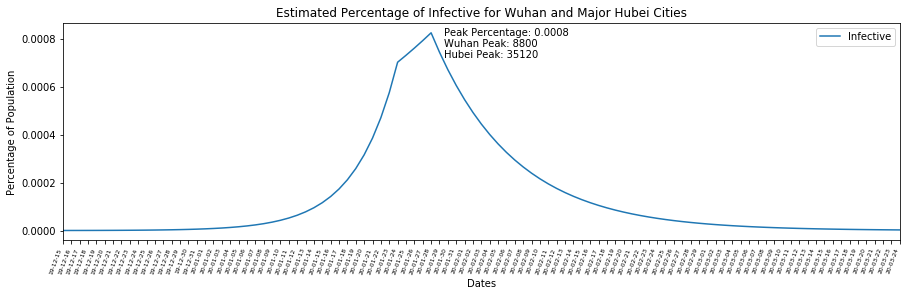

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(15,4))
#Ploting

#sns.scatterplot(x = "date", y = 'sus', data = data)
#ax = sns.lineplot(x = range(len(RES_t2[:,0])), y = RES_t2[:,0], label='Susceptibles')

ax = sns.lineplot(x = range(len(RES_t2[:,1])), y = RES_t2[:,1], label='Infective')

ax.set(xlim=(0, len(RES_t2[:,0])-1))

print(dates[1:2])


ax.set_xticks(np.arange(len(RES_t2[:,1])))

ax.set_xticklabels(dates[0:], rotation = 70, fontsize = 6, ha = "right")


#sns.lineplot(x = range(len(RES_t2[:,2])), y = RES_t2[:,2], label='Recovereds')

ax.set(xlabel='Dates', ylabel='Percentage of Population',title = 'Estimated Percentage of Infective for Wuhan and Major Hubei Cities')

ax.annotate(f"Peak Percentage: {round(max(RES_t2[:,1]), 4)}", xy=(0.45,1), xycoords="axes fraction",
                    xytext=(5,-5), textcoords="offset points",
                    ha="left", va="top")
ax.annotate(f"Wuhan Peak: {int(round(max(RES_t2[:,1]), 4)*1.1e7)}", xy=(0.45,0.95), xycoords="axes fraction",
                    xytext=(5,-5), textcoords="offset points",
                    ha="left", va="top")
ax.annotate(f"Hubei Peak: {int(round(max(RES_t2[:,1]), 4)*4.39e7)}", xy=(0.45,0.9), xycoords="axes fraction",
                    xytext=(5,-5), textcoords="offset points",
                    ha="left", va="top")
#ax.set_xticklabels(ax.get, rotation=90)


In [18]:
## get the max infectives

print(f"The peak portion of infectives is: {round(max(RES_t2[:,1]), 4)}")
print(f"In Wuhan, the peak population of infectives is: {round(max(RES_t2[:,1]), 4) * 1.1e7}")

## this is about twice of the estimated with no transmissibility reduction by Joe Wu.
## also, the peak time is actually delayed  


The peak portion of infectives is: 0.0008
In Wuhan, the peak population of infectives is: 8800.0
